Ref : 
https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [1]:
import numpy as np
X = np.array([[5,3],[10,15],[15,12],[24,10],[30,30],[85,70],[71,80],[60,78],[70,55],[80,91],])

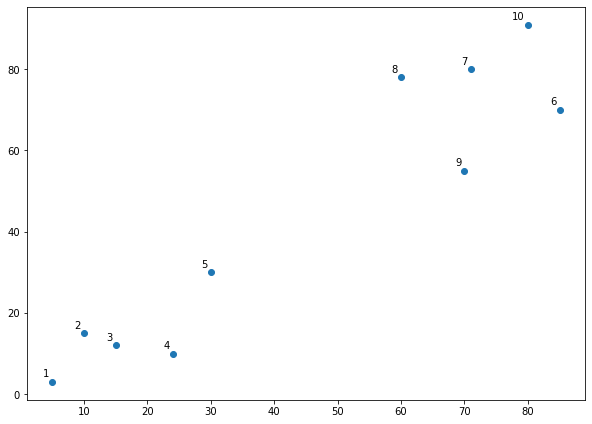

In [2]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

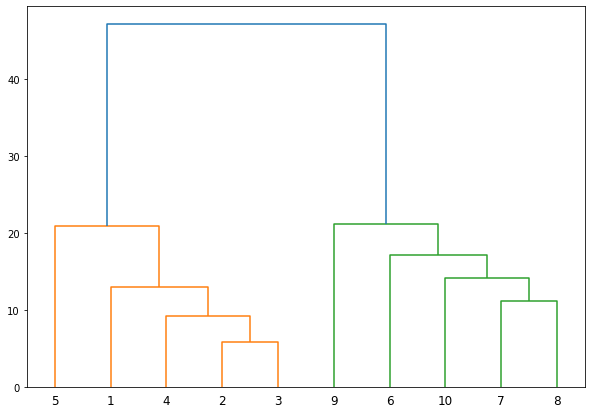

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [5]:
customer_data = pd.read_csv('shopping-data.csv')

In [6]:
customer_data.shape

(200, 5)

In [7]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender. Execute the following script to filter the first three columns from our dataset:

In [8]:
data = customer_data.iloc[:, 3:5].values

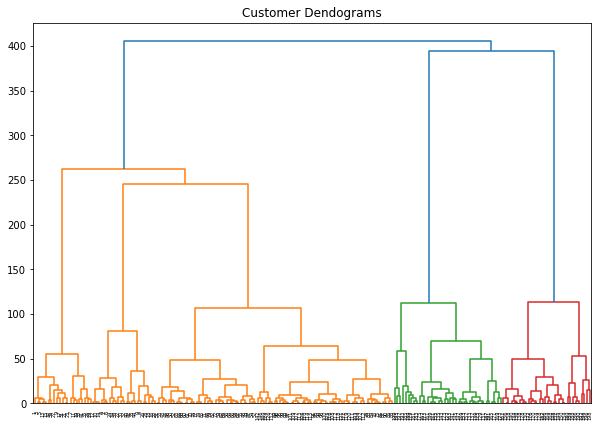

In [9]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

Now we know the number of clusters for our dataset, the next step is to group the data points into these five clusters. To do so we will again use the AgglomerativeClustering class of the sklearn.cluster library. Take a look at the following script:

In [10]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
cluster = KMeans(n_clusters=5)
pred = cluster.fit_predict(data)

In [12]:
score = silhouette_score(data, pred)

In [13]:
score

0.553931997444648

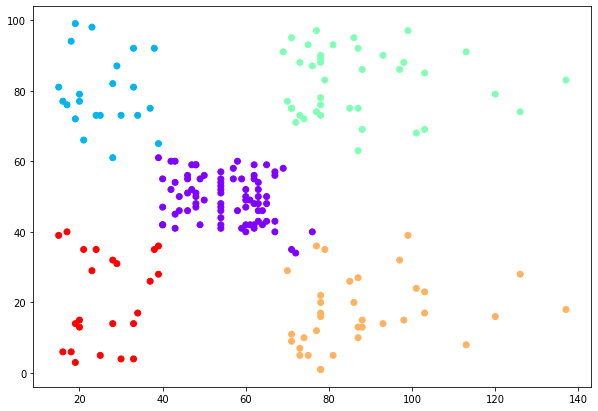

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

You can see the data points in the form of five clusters. The data points in the bottom right belong to the customers with high salaries but low spending. These are the customers that spend their money carefully. Similarly, the customers at top right (green data points), these are the customers with high salaries and high spending. These are the type of customers that companies target. The customers in the middle (blue data points) are the ones with average income and average salaries. The highest numbers of customers belong to this category. Companies can also target these customers given the fact that they are in huge numbers, etc.

In [15]:
from sklearn.metrics import silhouette_score
silhoutte_score = []
K = range(2,20)
for n in K:
    clusterer = KMeans(n_clusters=n)
    preds = clusterer.fit_predict(data)
    centers = clusterer.cluster_centers_
    score = silhouette_score(data, preds)
    silhoutte_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n, score))

For n_clusters = 2, silhouette score is 0.2968969162503008)
For n_clusters = 3, silhouette score is 0.46761358158775435)
For n_clusters = 4, silhouette score is 0.4931963109249047)
For n_clusters = 5, silhouette score is 0.553931997444648)
For n_clusters = 6, silhouette score is 0.5376203956398481)
For n_clusters = 7, silhouette score is 0.4534308150617143)
For n_clusters = 8, silhouette score is 0.45798247238543666)
For n_clusters = 9, silhouette score is 0.4592339450478494)
For n_clusters = 10, silhouette score is 0.45056557470336733)
For n_clusters = 11, silhouette score is 0.44975879378781536)
For n_clusters = 12, silhouette score is 0.45899899549134743)
For n_clusters = 13, silhouette score is 0.4342449537010975)
For n_clusters = 14, silhouette score is 0.43383405598389074)
For n_clusters = 15, silhouette score is 0.42511654352393924)
For n_clusters = 16, silhouette score is 0.4169293907950519)
For n_clusters = 17, silhouette score is 0.4213794182349501)
For n_clusters = 18, silho

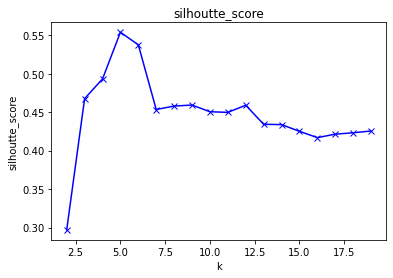

In [16]:
plt.plot(K, silhoutte_score, 'bx-')
plt.xlabel('k')
plt.ylabel('silhoutte_score')
plt.title('silhoutte_score')
plt.show()